In [77]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [78]:
fashion_mnist = tf.keras.datasets.fashion_mnist


(X_train , Y_train) , (X_test , Y_test) = fashion_mnist.load_data()
X_train , X_test = X_train / 255.0 , X_test / 255.0

4422102/4422102 [==============================] - 1s 0us/step


<ipython-input-79-fbe50f011a01>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5, i+1)


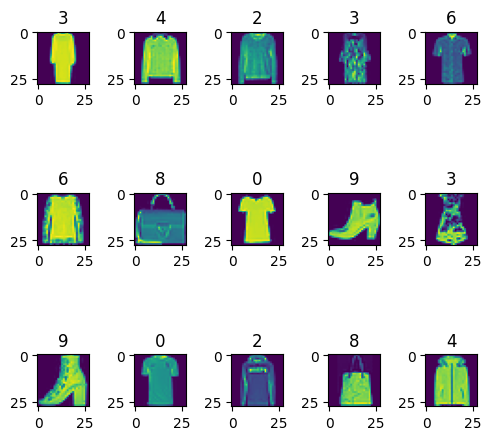

In [79]:
def show_fashion_mnist(data , labels) :
  plt.subplots(figsize=(5,5))
  for i in range(15):
    plt.subplot(3,5, i+1)
    k = np.random.randint(0 , data.shape[0])
    plt.title(labels[k])
    plt.imshow(data[k])
  plt.tight_layout()
  plt.show()



show_fashion_mnist(X_train , Y_train)

In [80]:

X_train = X_train.reshape(X_train.shape[0] , 28 , 28 , 1)
X_test = X_test.reshape(X_test.shape[0] , 28 , 28 , 1)


In [81]:
 # convert from integers to floats
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")



In [82]:
X_train[5].shape

(28, 28, 1)

In [83]:
Y_train[5].shape

()

In [87]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3) , activation = 'relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(210 , (3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(280 , (3,3) , activation = 'relu'),
    tf.keras.layers.Conv2D(256 , (3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),


    # machine learning
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [88]:
model.compile( optimizer= 'adamax',
              loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

model.fit(X_train, Y_train , epochs= 10)
model.evaluate(X_test, Y_test)

Epoch 1/10
1875/1875 [==============================] - 26s 12ms/step - loss: 0.5285 - accuracy: 0.8042
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3216 - accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2681 - accuracy: 0.9028
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2408 - accuracy: 0.9118
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2210 - accuracy: 0.9187
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2034 - accuracy: 0.9255
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1865 - accuracy: 0.9317
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1712 - accuracy: 0.9371
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1613 - accuracy: 0.9420
Epoch 10/10
313/313 [==============================] - 2s 7ms/st

[0.20040877163410187, 0.9301000237464905]